# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

ACT and SAT are standardised test used for college admissions in the United States.Over past few years, ACT (American College Testing) test is widely recognised than SAT (Scholastic Assessment Test) for college admissions in the United States.This project will explore in detail the trends of ACT and SAT test conducted in the year 2017 and 2018 and discuss about the low participation rates of SAT and recommendations on how to improve them.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
# reading the csv file into pandas dataframes
sat_2017=pd.read_csv('../data/sat_2017.csv')
act_2017=pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
#displaying the first 10 rows of dataframe
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Dataframe has information on the participation of students (in percentage)in act and sat 2017 test ,average score of students in various sections and Total average score in test across various states in USA.

#### 4a. Does the data look complete? 

Answer: Yes,since all the values are non null,data looks complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

One of the entry in sat_2017 for the Math in state **Maryland** was given as 52 instead of 524.<br>
One of the entry in act_2017 for the Composite in state **wyoming** was given as 20.2x instead of 20.2.



#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code
#the value in sat_2017['Math'] has been changed to 524 and in x is removed from act_2017['Composite']
sat_2017['Math'][20]=524
act_2017['Composite'][51]=20.2


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
#code
#datatype of each variable in dataframe
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer**:
The following columns are odd:

|column name|data set name |Current data type| data type|
|---|---|---|---|
|Participation|act_2017|object(string)|integer|
|Participation |sat_2017| object(string)| integer|
|Composite  |act_2017 |object(string)| float|


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
#code
# removing percentage symbol in sat_2017-Participation column
sat_2017['Participation']= sat_2017 ['Participation'].str.replace('%','')

In [9]:
#conveting participation in sat_2017 column to integer
sat_2017['Participation']=sat_2017 ['Participation'].apply(pd.to_numeric)

In [10]:
#checking the datatype of participation column
sat_2017['Participation'].dtype

dtype('int64')

In [11]:
#removing percentage symbol in act_2017-Participation column and conveting it to integer and checking the data type

act_2017['Participation']=act_2017 ['Participation'].str.replace('%','')
act_2017['Participation']=act_2017 ['Participation'].apply(pd.to_numeric)
act_2017['Participation'].dtype

dtype('int64')

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
#code
#removing character in act_2017-composite column and conveting it to float and checking the data type
act_2017['Composite']=pd.to_numeric(act_2017['Composite'])
act_2017['Composite'].dtype

dtype('float64')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [13]:
#datatype of sat_2017
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


- Display the data types again to confirm they are correct.

In [14]:
#datatype of act_2017
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#code
#renaming sat_2017 columns
sat_2017.rename(columns={"State": "state", "Participation": "sat_2017_participation",'Evidence-Based Reading and Writing':'sat_2017_evidence_based_rw','Math':'sat_2017_math','Total':'sat_2017_total'},inplace=True)
sat_2017.columns

Index(['state', 'sat_2017_participation', 'sat_2017_evidence_based_rw',
       'sat_2017_math', 'sat_2017_total'],
      dtype='object')

In [16]:
#renaming act_2017 columns
act_2017.rename(columns={"State": "state", "Participation": "act_2017_participation",'English':'act_2017_english','Math':'act_2017_math','Reading':'act_2017_reading','Science':'act_2017_science','Composite':'act_2017_total'},inplace=True)
act_2017.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_total'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 

**Data Dictionary for ACT 2017 and SAT 2017**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|sat_2017|Name of the state in USA|
|sat_2017_participation|int64|sat_2017|Average participation rate of students who took  SAT 2017| 
|sat_2017__evidence-based_rw|float64|sat_2017|Average mark of students in Evidence based reading and writing section in SAT 2017|
|sat_2017_Math|float64|sat_2017|Average mark of students in Math section in SAT 2017|
|sat_2017_Total|float64|sat_2017|Average Total mark of studentsin SAT 2017|
|state|object|act_2017|Name of the state in USA|
|act_2017_participation|int64|act_2017|Average participation rate  of students who took  Act 2017| 
|act_2017_English|float64|act_2017|Average mark of students in English section in Act 2017|
|act_2017_Math|float64|act_2017|Average mark of students in Math section in Act 2017|
|act_2017_Reading|float64|act_2017|Average mark of students in Reading section in Act 2017|
|act_2017_Science|float64|act_2017|Average mark of students in science section in Act 2017|
|act_2017_Composite|float64|act_2017|Average Total mark of students in Act 2017|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
#code
#act_2017 has a extra row
act_2017.drop([0],inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
#merginf act_2017 and sat_2017 into a new data frame called act_sat_2017
act_sat_2017 = pd.merge(act_2017, sat_2017,how='left')
act_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state                         51 non-null object
act_2017_participation        51 non-null int64
act_2017_english              51 non-null float64
act_2017_math                 51 non-null float64
act_2017_reading              51 non-null float64
act_2017_science              51 non-null float64
act_2017_total                51 non-null float64
sat_2017_participation        51 non-null int64
sat_2017_evidence_based_rw    51 non-null int64
sat_2017_math                 51 non-null int64
sat_2017_total                51 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
#saving data as combined_2017.csv
act_sat_2017.loc[ :].to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [20]:
#loading 2018 ACT and SAT data set
sat_2018=pd.read_csv('../data/sat_2018.csv')
act_2018=pd.read_csv('../data/act_2018_updated.csv')

**SAT 2018** -cleaning and clearing
--------------


In [21]:
#sat_2018 columns and datatypes
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [22]:
# dataframe values in sat_2018
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [23]:
#Removing % symbol in participation column in sat_2018
sat_2018['Participation']= sat_2018 ['Participation'].str.replace('%','')
#conveting participation column to integer
sat_2018['Participation']=sat_2018 ['Participation'].apply(pd.to_numeric)

In [24]:
#renaming sat_2018 columns
sat_2018.rename(columns={"State": "state", "Participation": "sat_2018_participation",'Evidence-Based Reading and Writing':'sat_2018_evidence_based_rw','Math':'sat_2018_math','Total':'sat_2018_total'},inplace=True)
sat_2018.columns

Index(['state', 'sat_2018_participation', 'sat_2018_evidence_based_rw',
       'sat_2018_math', 'sat_2018_total'],
      dtype='object')

**ACT 2018** -cleaning and clearing
--------------

In [25]:
# sat_2018 columns and datatypes
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [26]:
#dataframe values in act_2018
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [27]:
#renaming act_2018 columns
act_2018.rename(columns={"State": "state", "Percentage of Students Tested": "act_2018_participation",'Average English Score':'act_2018_english','Average Math Score':'act_2018_math','Average Reading Score':'act_2018_reading','Average Science Score':'act_2018_science','Average Composite Score':'act_2018_total'},inplace=True)
act_2018.columns

Index(['state', 'act_2018_participation', 'act_2018_total', 'act_2018_english',
       'act_2018_math', 'act_2018_reading', 'act_2018_science'],
      dtype='object')

**Data Dictionary for ACT 2018 and SAT 2018**



|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|sat_2018|Name of the state in USA|
|sat_2018_participation|int64|sat_2018|Average participation rate of students who took  SAT 2018| 
|sat_2018__evidence-based_rw|float64|sat_2018|Average mark of students in Evidence based reading and writing section in SAT 2018|
|sat_2018_Math|float64|sat_2018|Average mark of students in Math section in SAT 2018|
|sat_2018_Total|float64|sat_2018|Average Total mark of studentsin SAT 2018|
|state|object|act_2018|Name of the state in USA|
|act_2018_participation|int64|act_2018|Average participation rate  of students who took  Act 2018| 
|act_2018_English|float64|act_2018|Average mark of students in English section in Act 2018|
|act_2018_Math|float64|act_2018|Average mark of students in Math section in Act 2018|
|act_2018_Reading|float64|act_2018|Average mark of students in Reading section in Act 2018|
|act_2018_Science|float64|act_2018|Average mark of students in science section in Act 2018|
|act_2018_Composite|float64|act_2018|Average Total mark of students in Act 2018|



**Merging act_2018 and sat_2018**

In [28]:
#merging act_2018 and sat_2018 into a new data frame called act_sat_2018
act_sat_2018 = pd.merge(act_2018, sat_2018,how='left')
act_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state                         51 non-null object
act_2018_participation        51 non-null int64
act_2018_total                51 non-null float64
act_2018_english              51 non-null float64
act_2018_math                 51 non-null float64
act_2018_reading              51 non-null float64
act_2018_science              51 non-null float64
sat_2018_participation        51 non-null int64
sat_2018_evidence_based_rw    51 non-null int64
sat_2018_math                 51 non-null int64
sat_2018_total                51 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 4.8+ KB


In [29]:
#saving data as combined_2018.csv
act_sat_2018.loc[ :].to_csv('../data/combined_2018.csv',index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

**Merging act_sat_2017 and act_sat_2018**

In [30]:
final = pd.merge(act_sat_2017, act_sat_2018,how='left')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                         51 non-null object
act_2017_participation        51 non-null int64
act_2017_english              51 non-null float64
act_2017_math                 51 non-null float64
act_2017_reading              51 non-null float64
act_2017_science              51 non-null float64
act_2017_total                51 non-null float64
sat_2017_participation        51 non-null int64
sat_2017_evidence_based_rw    51 non-null int64
sat_2017_math                 51 non-null int64
sat_2017_total                51 non-null int64
act_2018_participation        51 non-null int64
act_2018_total                51 non-null float64
act_2018_english              51 non-null float64
act_2018_math                 51 non-null float64
act_2018_reading              51 non-null float64
act_2018_science              51 non-null float64
sat_2018_participation        51 non-null int64
sat_2018_evi

In [31]:
# saving data as  final.csv
final .loc[ :].to_csv('../data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [32]:
#Quick overview of final dataset
final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_total,sat_2017_participation,sat_2017_evidence_based_rw,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_total,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_evidence_based_rw,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [33]:
def std_dev(num):
    sum1=0
    sum2=0
    std=0
    
    #calculating mean of the numbers in list
    for i in num:
        sum1=sum1+i
    
    mean=sum1/len(num)
    
    
    #Subtracting every item in the list with mean,squaring it and summation is stored in a variable called sum2 
    for i in num:
        sum2=sum2+((i-mean)**2)
        
    # calculating variance
    variance=sum2/len(num)
    
    #calculating standard deviation
    std=math.sqrt(variance)
    return(std)



In [34]:
# applying function std_dev to all the numerical columns in datset

{col.name:std_dev(col) for col in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 3.151107895464408,
 'act_2017_total': 2.000786081581989,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_evidence_based_rw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 33.745194881997506,
 'act_2018_total': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'sat_2018_participation': 36.946619223539415,
 'sat_2018_evidence_based_rw': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

In [35]:
# applying numpy standard deviation to all the numerical columns in datset

{col.name:np.std(col) for col in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 3.151107895464408,
 'act_2017_total': 2.000786081581989,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_evidence_based_rw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 33.745194881997506,
 'act_2018_total': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'sat_2018_participation': 36.946619223539415,
 'sat_2018_evidence_based_rw': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer**
No the answers do not match up.
Manually calculated standard deviations match with numpy std results but not with describe method,because numpy uses the same formula as shown above but describe method divides Σ(𝑥𝑖−𝜇)^2 by (n-1).

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**ACT 2017 & 2018 high participation**
------------------------------------

In [36]:
final.loc[(final['act_2017_participation']==100) | (final['act_2018_participation']==100),['state','act_2017_participation','act_2018_participation']].head()



,state,act_2017_participation,act_2018_participation
0,Alabama,100,100
3,Arkansas,100,100
5,Colorado,100,30
17,Kentucky,100,100
18,Louisiana,100,100


The above table shows- States with 100% participation in **ACT** test either in the year 2017 or 2018 (compared with next or previous year  ) 


**Colorado** has drastically dropped from 100 % to 30 %



**SAT 2017 & 2018 high participation**
------------------------------------

In [37]:
final.loc[(final['sat_2017_participation']==100) | (final['sat_2018_participation']==100),['state','sat_2017_participation','sat_2018_participation']].head()

,state,sat_2017_participation,sat_2018_participation
5,Colorado,11,100
6,Connecticut,100,100
7,Delaware,100,100
8,District of Columbia,100,92
12,Idaho,93,100


States with 100% participation in **SAT** test either in the year 2017 or 2018 (compared with next or previous year  ) 

**Colorado** has drastically incresed from 11% to 100%

**Idaho** has incresed from 93% to 100%

**Dist of Columbia** has dropped from 100 to 92%

**ACT 2017 & 2018 low participation**
------------------------------------

In [38]:
final[['state','act_2017_participation']].sort_values(by='act_2017_participation',ascending=True).head()

,state,act_2017_participation
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


States with low **ACT** participation in the year 2017

In [39]:
final[['state','act_2018_participation']].sort_values(by='act_2018_participation',ascending=True).head()

,state,act_2018_participation
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


States with low **ACT** participation in the year 2018


The above states with low participation rate in 2017 and 2018 in ACT, but high participation rate in SAT.

**Maine** -97(approximately)

**New Hampshire** - 96%

**Delaware**- 100%

**Rhode Island**- 81%

**SAT 2017 & 2018 low participation**
------------------------------------

In [40]:
final[['state','sat_2017_participation']].sort_values(by='sat_2017_participation',ascending=True).head()

,state,sat_2017_participation
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


States with low **SAT** participation in the year 2017

In [41]:
final[['state','sat_2018_participation']].sort_values(by='sat_2018_participation',ascending=True).head()

,state,sat_2018_participation
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3


States with low **SAT** participation in the year 2018




The above states with low participation rate in 2017 and 2018 in SAT, but high participation rate in ACT

**Iowa** - 65%(approximately)

**Mississippi** - 100%(approximately)

**North Dakota** -98%(approximately)

**Wyoming**-100%

**South Dakota**- 78%(approximately)



**ACT 2017 & 2018 high Total Avg Score**
------------------------------------

In [42]:
maximum=final['act_2017_total'].max()
final.loc[final['act_2017_total']==maximum,['state','act_2017_total']]

,state,act_2017_total
29,New Hampshire,25.5


In [43]:
maximum=final['act_2018_total'].min()
final.loc[final['act_2018_total']==maximum,['state','act_2018_total']]

,state,act_2018_total
28,Nevada,17.7


**SAT 2017 & 2018 high Total Avg Score**
------------------------------------

In [44]:
maximum=final['sat_2017_total'].max()
final.loc[final['sat_2017_total']==maximum,['state','sat_2017_total']]

,state,sat_2017_total
23,Minnesota,1295


In [45]:
maximum=final['sat_2018_total'].min()
final.loc[final['sat_2018_total']==maximum,['state','sat_2018_total']]

,state,sat_2018_total
8,District of Columbia,977


**States with greater than 50% participation on both tests either year**
------------------------------------


In [46]:
final.loc[(final['act_2017_participation']>50) & (final['act_2018_participation']>50),['state','act_2017_participation','act_2018_participation']].head()

,state,act_2017_participation,act_2018_participation
0,Alabama,100,100
2,Arizona,62,66
3,Arkansas,100,100
9,Florida,73,66
10,Georgia,55,53


States with more than 50% participation rates in ACT 2017 and 2018

In [47]:
final.loc[(final['sat_2017_participation']>50) & (final['sat_2018_participation']>50),['state','sat_2017_participation','sat_2018_participation']].head()

,state,sat_2017_participation,sat_2018_participation
4,California,53,60
6,Connecticut,100,100
7,Delaware,100,100
8,District of Columbia,100,92
9,Florida,83,56


States with more than 50% participation rates in SAT 2017 and 2018

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

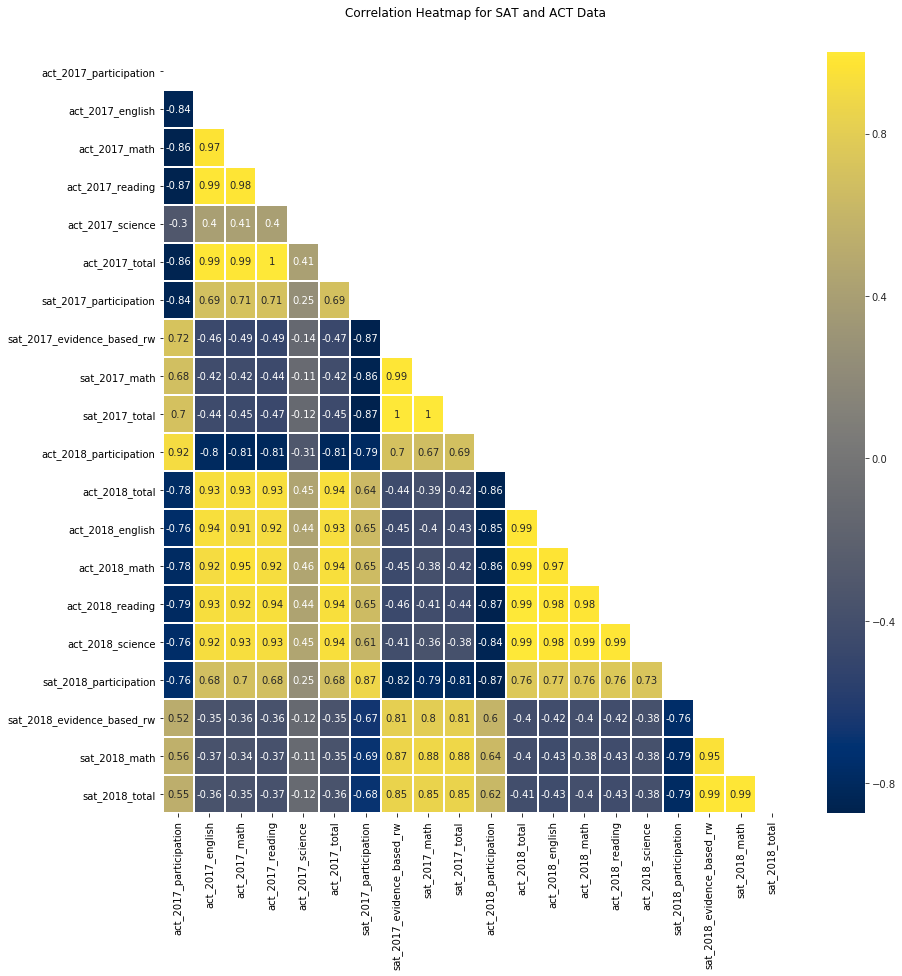

In [48]:

#Seaborn Heatmap visualizes correlation between all numeric features
fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_title('Correlation Heatmap for SAT and ACT Data\n\n');

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(final.corr(),annot=True,cmap='cividis',linecolor='white',linewidth=1,mask=mask)
  

This shows the correlation of one variable with another .The squares with dark yellow indicates they are positively correlated( as one value increases,the other value also increases) and dark blue indicates they are negatively correlated ( as one value increases,the other value decreases) 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [49]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(12,6),nrows=nrows, ncols=2,tight_layout=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=35)# feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

**Participation rates for SAT & ACT**
-------------------------------------

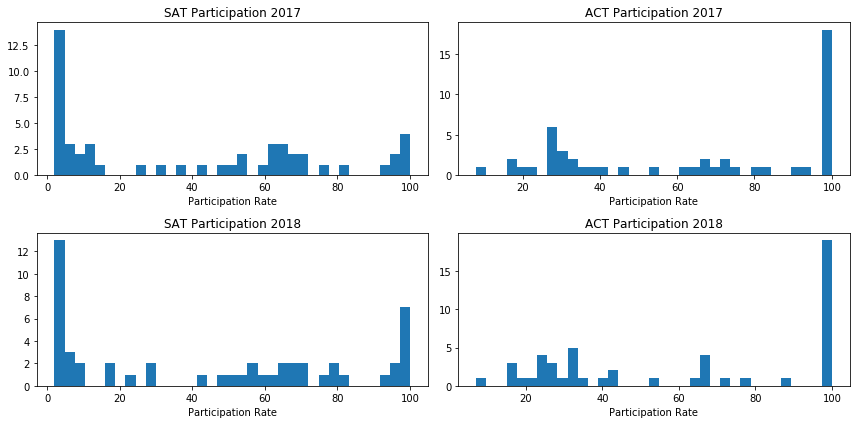

<Figure size 432x288 with 0 Axes>

In [50]:
subplot_histograms(final,
                   ['sat_2017_participation','act_2017_participation','sat_2018_participation','act_2018_participation'],
                   ['SAT Participation 2017','ACT Participation 2017','SAT Participation 2018','ACT Participation 2018',],
                   ['Participation Rate','Participation Rate','Participation Rate','Participation Rate'])

plt.show()
plt.savefig('histogram')

SAT shows a larger group of states with 42-80% participation, as well as a smaller set of highly committed states.<br>
ACT shows a large group of highly committed states (as frequency near 100 is more).

**Math scores for SAT & ACT**
-------------------------------------

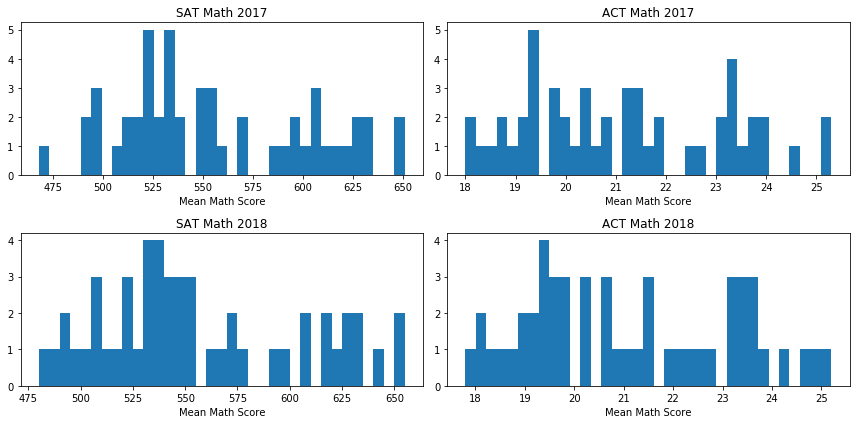

In [51]:
subplot_histograms(final,
                   ['sat_2017_math','act_2017_math','sat_2018_math','act_2018_math'],
                   ['SAT Math 2017','ACT Math 2017','SAT Math 2018','ACT Math 2018'],
                   ['Mean Math Score','Mean Math Score','Mean Math Score','Mean Math Score'])

plt.show()

SAT - Average Math score is between 480 and 650 in the year 2018,Minimum math score has improved in 2018.  

ACT- Average Math score is consistent in 2017 and 2018 and falls  between 18 to 27.

**Reading/verbal scores for SAT & ACT **
-------------------------------------

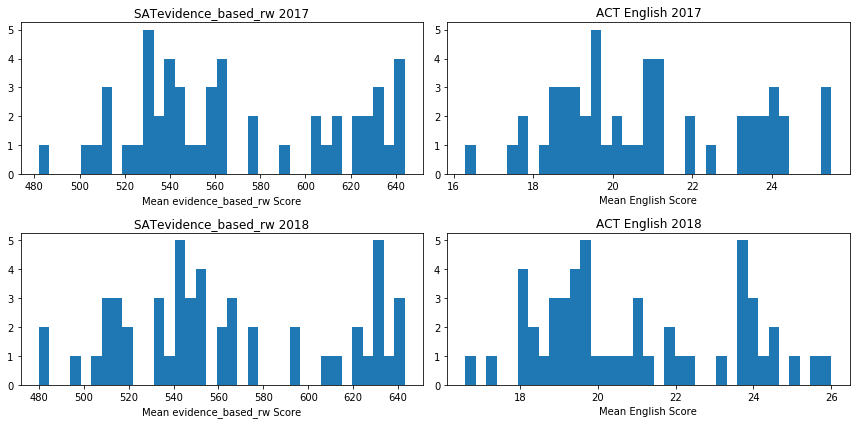

In [52]:
subplot_histograms(final,
                   ['sat_2017_evidence_based_rw','act_2017_english','sat_2018_evidence_based_rw','act_2018_english'],
                   ['SATevidence_based_rw 2017','ACT English 2017','SATevidence_based_rw 2018','ACT English 2018',],
                   ['Mean evidence_based_rw Score','Mean English Score','Mean evidence_based_rw Score','Mean English Score'])

plt.show()

SAT - Average score is consistent in 2017 and 2018 and falls between 480 and 650. 

ACT- Average score is consistent in 2017 and 2018 and falls  between 16 and 26. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [53]:
# Code
#Defines a function to create a scatterplot between two variables
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(8,5))
    sns.set_style('whitegrid')
    sns.scatterplot(x=final[column1],y=final[column2],s=60)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,fontsize=20);


**SAT vs. ACT math scores for 2017**
--------------------------------------

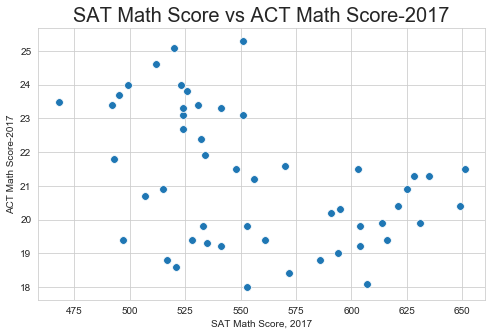

In [54]:

subplot_scatterplot('sat_2017_math','act_2017_math',
                    'SAT Math Score, 2017','ACT Math Score-2017',
                    'SAT Math Score vs ACT Math Score-2017')

The data points are spread out across this graph. This means there is no trend to the data; thus, there is no correlation. 

**SAT vs. ACT verbal/reading scores for 2017**
--------------------------------------

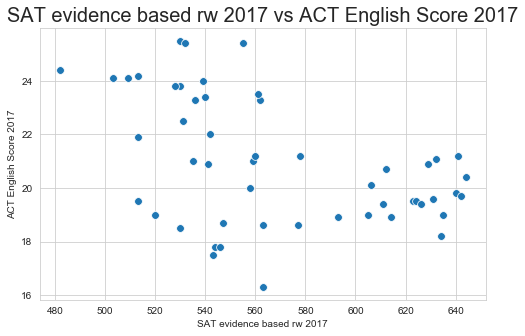

In [55]:
subplot_scatterplot('sat_2017_evidence_based_rw','act_2017_english',
                    'SAT evidence based rw 2017','ACT English Score 2017',
                    'SAT evidence based rw 2017 vs ACT English Score 2017')

The data points are spread out across this graph. This means there is no trend to the data; thus, there is no correlation.

**SAT vs. ACT total scores for 2017**
--------------------------------------

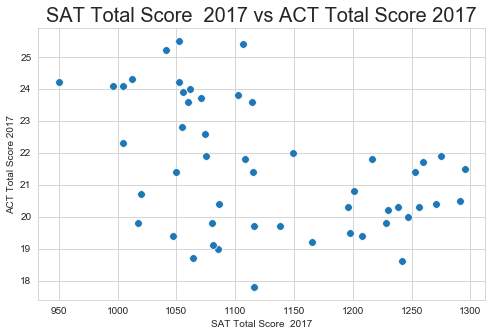

In [56]:
subplot_scatterplot('sat_2017_total','act_2017_total',
                    'SAT Total Score  2017','ACT Total Score 2017',
                    'SAT Total Score  2017 vs ACT Total Score 2017')

The data points are spread out across this graph. This means there is no trend to the data; thus, there is no correlation.

**Total scores for ACT 2017 vs. 2018**
--------------------------------------

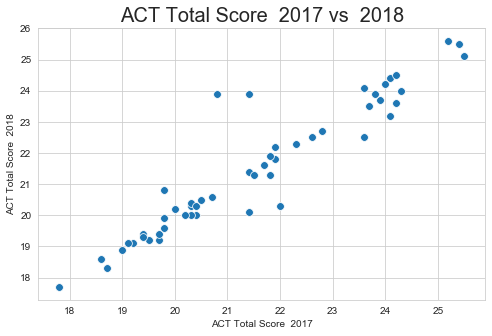

In [57]:
subplot_scatterplot('act_2017_total','act_2018_total',
                    'ACT Total Score  2017','ACT Total Score  2018',
                    'ACT Total Score  2017 vs  2018')

This shows a positive correlation. ACT scores were consistent in 2017 and 2018

**Total scores for SAT 2017 vs. 2018**
--------------------------------------

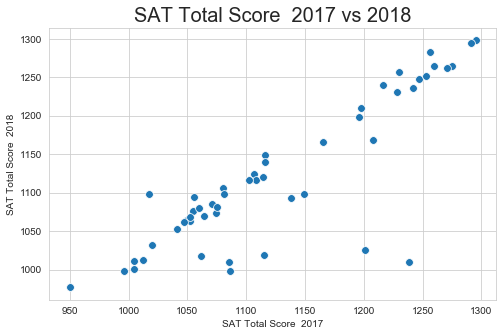

In [58]:
subplot_scatterplot('sat_2017_total','sat_2018_total',
                    'SAT Total Score  2017','SAT Total Score  2018',
                    'SAT Total Score  2017 vs 2018')

This shows a positive correlation. SAT scores were consistent in 2017 and 2018

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

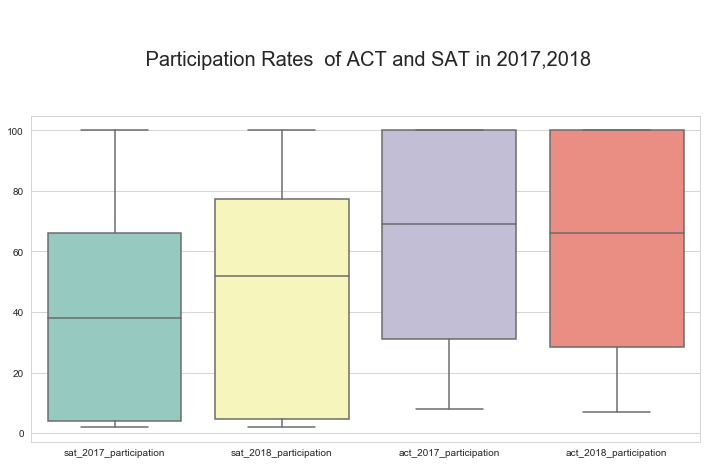

In [59]:
# Code
#Boxplot for ACT and SAT participation rates, 2017 and 2018 
participation_rates = final.loc[:,['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']]

plt.figure(figsize=(12,6))
plt.title('\n\n Participation Rates  of ACT and SAT in 2017,2018\n\n',fontsize=20)
sns.boxplot(data=participation_rates,palette='Set3');
plt.savefig('boxplot')

It is evident that ACT 's 25 % to 75% quartile is between 30 and 100.SAT's 25 % to 75% quartile is between 6 and 76.Though ACT has performed better that SAT, Average participation rate of SAT in 2018 has increased and ACT has decreased.(which is evident from median line shown in the centre)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:<br>
It is evident (from the boxplot shown above) that ACT has performed better(participation rates) than SAT in both the year 2017 and 2018.But the average participation rate has declined from 65 % in 2017 to 61% in 2018.On the other hand, SAT has improved from 39% participation rate in the year 2017 to 45% in 2018.<br>
Though the average score of ACT(English,Math,Reading,Science and Total ) and SAT (Evidence based Reading and Writing,Math and Total) is consitent in the year 2017 and 2018, it is important to note that students are performing better in **ACT Science** section as minimum score in science has drastically improved from 2.3 to 17 in the year 2018.<br>
Students are performing better in **SAT Math** section as minimum score in Math has improved from 468 to 480 in 2018 and the minimum Total score of SAT has improved from 950 to 977.(values are evident from the describe()method shown above)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No the sample is not normally distributed, as we can see from the histograms shown above.

Does This Assumption Hold for:
    - Math 
    - Reading 
    - Rates 
Explain your answers for each distribution and how you think this will affect estimates made from these data.


Answer: Math,Reading and Participation rates from SAT and ACT is not normally distributed, which can be clearly seen from histograms shown above with explanation.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No. Cannot apply statistical inference as Confidence interveal gives lower and upper bound of probability which is not relavent in this case. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
SAT and ACT are two different test with different pattern for Math section. Students score cannot be compared.Eg If a student A has taken SAT and student B has taken ACT ,their scores cannot be compared in general as Math score.




#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Answer:**<br>

Based upon the observations- Colorado, Illinois and Rhode Island have interesting trends (as shown in table below) in ACT and SAT participation rates.It is seen that the above states have drastically improved their SAT participation rates and dropped ACT participation rates.The increase in the rates of these states is because of the following factors:<br> 
-States have implemented SAT School Day which allows students to take the SAT at their own school, during the school day.<br> 
-SAT pattern has been changed in the year 2016 which fits with common core pattern of the School.

Note :
Nine states—Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, and Rhode Island—and the District of Columbia administered the SAT statewide, which shows participation rates of more than 90%.(https://reports.collegeboard.org/archive/sat-suite-program-results/2017/class-2017-results)



In [60]:
#code
(final.loc[(final['state']=='Rhode Island')|(final['state']=='Colorado')|(final['state']=='Illinois'),['state','sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']])



,state,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
5,Colorado,11,100,100,30
13,Illinois,9,99,93,43
39,Rhode Island,71,97,21,15


### Conclusions and Recommendations

 Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Answer**The ACT and SAT participation distributions roughly mirror each other(as shown below), with states tending to prefer one test or the other. ACT shows a large group of highly committed states, and a higher participation nationwide.SAT shows a larger group of states with 20-75% participation, as well as a smaller set of highly committed states.The ACT has been doing quite well.The SAT made clear gains in 2018 relative to the ACT.Targeting states similar to 2018, should be promising for the College Board moving forward. 

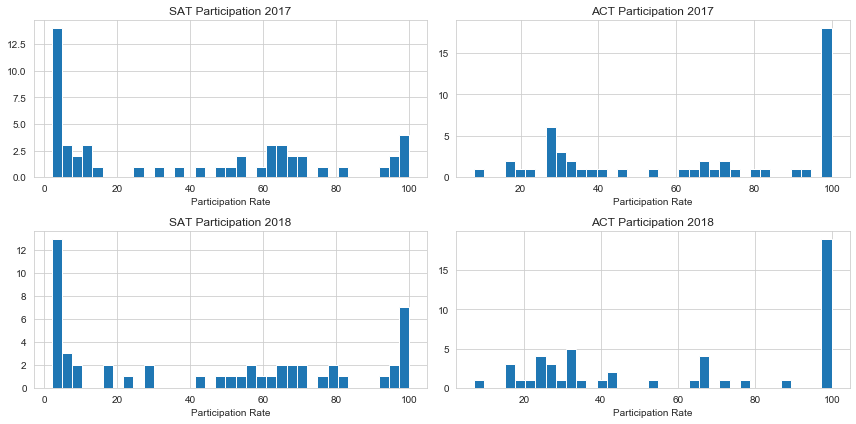

In [61]:
#code
subplot_histograms(final,
                   ['sat_2017_participation','act_2017_participation','sat_2018_participation','act_2018_participation'],
                   ['SAT Participation 2017','ACT Participation 2017','SAT Participation 2018','ACT Participation 2018',],
                   ['Participation Rate','Participation Rate','Participation Rate','Participation Rate'])

plt.show()